# Spotify Recommendation Model - Group 8 

In [1]:
# https://www.kaggle.com/datasets/yelexa/spotify200?resource=download

In [2]:
# https://developer.spotify.com/documentation/web-api
# /reference/get-several-audio-features

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans,MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [4]:
# importing the data set and desplaying it 

dt = pd.read_csv("final short.csv", low_memory=False)

In [5]:
# showing all the columns 

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(dt)

,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Plan A,2022-03-23,1.0,https://i.scdn.co/image/ab67616d0000b2737e1179...,WEA Latina,1,1,4,3003411,2022-04-14,0.583,0.8340000000000001,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,ARRANCARMELO,2022-04-06,1.0,https://i.scdn.co/image/ab67616d0000b273d8c994...,DOGUITO Records / DALE PLAY Records,2,129,2,2512175,2022-04-14,0.654,0.354,5.0,1.0,-7.358,0.0738,0.7240000000000001,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105328,105328,spotify:track:0aZnyTWJNgdzYoOiaW8HKG,154,KAROL G,1.0,KAROL G,spotify:artist:790FomKkXshlbRYZFtlgla,reggaeton,https://i.scdn.co/image/ab6761610000e5ebfe5bb3...,0,200 COPAS,2021-03-26,16.0,https://i.scdn.co/image/ab67616d0000b273ae28c8...,UMLE - Latino,149,188,6,19787,2021-07-15,0.515,0.7040000000000001,9,0,-5.25,0.20600000000000002,0.767,0.0,0.415,0.885,91.24600000000001,217213,Bolivia,South America,Spanish,0
105329,105329,spotify:track:7EkWXAI1wn8Ii883ecd9xr,155,Surf Curse,1.0,Surf Curse,spotify:artist:1gl0S9pS0Zw0qfa14rDD3D,surf punk,https://i.scdn.co/image/ab6761610000e5eb7fabcf...,0,Freaks,2021-05-15,1.0,https://i.scdn.co/image/ab67616d0000b2739efda6...,Surf Curse,141,146,4,19733,2021-07-15,0.345,0.941,9,1,-9.918,0.0466,3.84e-05,0.633,0.0511,0.40700000000000003,179.62599999999995,147062,Bolivia,South America,Spanish,0


In [6]:
dt.shape

(105330, 36)

In [7]:
dt.columns

Index(['Unnamed: 0', 'uri', 'rank', 'artist_names', 'artists_num',
       'artist_individual', 'artist_id', 'artist_genre', 'artist_img',
       'collab', 'track_name', 'release_date', 'album_num_tracks',
       'album_cover', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart',
       'streams', 'week', 'danceability', 'energy', 'key', 'mode', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'country', 'region', 'language',
       'pivot'],
      dtype='object')

In [8]:
dt.dtypes

Unnamed: 0            int64
uri                  object
rank                 object
artist_names         object
artists_num          object
artist_individual    object
artist_id            object
artist_genre         object
artist_img           object
collab               object
track_name           object
release_date         object
album_num_tracks     object
album_cover          object
source               object
peak_rank            object
previous_rank        object
weeks_on_chart       object
streams              object
week                 object
danceability         object
energy               object
key                  object
mode                 object
loudness             object
speechiness          object
acousticness         object
instrumentalness     object
liveness             object
valence              object
tempo                object
duration             object
country              object
region               object
language             object
pivot               

In [9]:
dt["language"].unique()

array(['Spanish', 'language', 'English', 'German', 'Russian', 'Dutch'],
      dtype=object)

In [10]:
dt[dt["language"] == "language"]

,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
29476,29476,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
51224,51224,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
75474,75474,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
81333,81333,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
104818,104818,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot


In [11]:
# fixing some rows that have invalid input

ids_to_delete = [29476, 51224, 75474, 81333, 104818]
dt.drop(ids_to_delete, inplace=True)
dt["language"].unique()

array(['Spanish', 'English', 'German', 'Russian', 'Dutch'], dtype=object)

In [12]:
dt["language"].value_counts()

Spanish    29987
German     24249
Dutch      23484
English    21747
Russian     5858
Name: language, dtype: int64

In [13]:
dt["language"].value_counts().sum()

105325

In [15]:
# filtering data to have only usefull features

fields_to_drop = [
    'Unnamed: 0','artist_img',
    'collab', 'release_date', 'album_num_tracks',
    'album_cover', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart',
    'week',
    'duration', 
    'pivot']

dt_filtered =  dt.drop(fields_to_drop, axis='columns')

In [16]:
# elemenating null values
# dt_filtered = dt

dt_filtered.isnull().sum()

uri                    0
rank                   0
artist_names           0
artists_num            0
artist_individual      0
artist_id              0
artist_genre           0
track_name             0
streams                0
danceability         104
energy               104
key                  104
mode                 104
loudness             104
speechiness          104
acousticness         104
instrumentalness     104
liveness             104
valence              104
tempo                104
country                0
region                 0
language               0
dtype: int64

In [17]:
undeleted_nulls = dt_filtered.shape[0]
undeleted_nulls

105325

In [18]:
dt_filtered = dt_filtered.dropna()
dt_filtered.isnull().sum()

uri                  0
rank                 0
artist_names         0
artists_num          0
artist_individual    0
artist_id            0
artist_genre         0
track_name           0
streams              0
danceability         0
energy               0
key                  0
mode                 0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
country              0
region               0
language             0
dtype: int64

In [19]:
dt_filtered.shape[0]

105221

In [20]:
deleted_nulls = dt_filtered.shape[0]
undeleted_nulls - deleted_nulls

104

In [21]:
dt_filtered.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,track_name,streams,danceability,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,Plan A,3003411,0.583,...,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,ARRANCARMELO,2512175,0.654,...,-7.358,0.0738,0.7240000000000001,0.0,0.134,0.262,81.956,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,Chance,2408983,0.721,...,-9.483,0.0646,0.241,0.0,0.0929,0.21600000000000005,137.915,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,Una Noche en Medellín,2080139,0.87,...,-5.252999999999999,0.077,0.0924,4.6e-05,0.0534,0.8320000000000001,96.018,Argentina,South America,Spanish
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,cuatro veinte,1923270,0.7609999999999999,...,-3.817,0.0505,0.0811,6.25e-05,0.101,0.501,95.066,Argentina,South America,Spanish


In [22]:
# changing fields type to float  

columns_to_convert = [
       'rank', 'streams','danceability', 'energy', 'key', 'mode', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

for column in columns_to_convert:
    dt_filtered[column]=pd.to_numeric(dt_filtered[column],errors='coerce')
    
dt_filtered.dtypes

uri                   object
rank                   int64
artist_names          object
artists_num           object
artist_individual     object
artist_id             object
artist_genre          object
track_name            object
streams                int64
danceability         float64
energy               float64
key                  float64
mode                 float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
country               object
region                object
language              object
dtype: object

In [23]:
dt_filtered.loc[20]

uri                   spotify:track:2rDZhKnPaPG054ExZ6nXUS
rank                                                    49
artist_names                                   Ryan Castro
artists_num                                            1.0
artist_individual                              Ryan Castro
artist_id            spotify:artist:7j6DKwmjbxvpQO8h914uEz
artist_genre                               trap colombiano
track_name                                          Jordan
streams                                             643830
danceability                                         0.796
energy                                                0.68
key                                                   10.0
mode                                                   0.0
loudness                                            -5.555
speechiness                                           0.37
acousticness                                        0.0575
instrumentalness                                  0.0006

In [24]:
# finding outliers

z_scores = stats.zscore(dt_filtered ['streams'])
outliers = dt_filtered[abs(z_scores) > 3]
outliers

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,track_name,streams,danceability,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,Plan A,3003411,0.583,...,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,ARRANCARMELO,2512175,0.654,...,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,Chance,2408983,0.721,...,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,Una Noche en Medellín,2080139,0.870,...,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,Argentina,South America,Spanish
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,cuatro veinte,1923270,0.761,...,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50921,spotify:track:4iJyoBOLtHqaGxP12qzhQI,2,"Justin Bieber, Daniel Caesar, Giveon",3.0,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s,pop,Peaches (feat. Daniel Caesar & Giveon),1653399,0.677,...,-6.181,0.1190,0.3210,0.000000,0.4200,0.464,90.030,Australia,Oceania,English
50922,spotify:track:4iJyoBOLtHqaGxP12qzhQI,2,"Justin Bieber, Daniel Caesar, Giveon",3.0,Daniel Caesar,spotify:artist:20wkVLutqVOYrc0kxFs7rA,r&b,Peaches (feat. Daniel Caesar & Giveon),1653399,0.677,...,-6.181,0.1190,0.3210,0.000000,0.4200,0.464,90.030,Australia,Oceania,English
50923,spotify:track:4iJyoBOLtHqaGxP12qzhQI,2,"Justin Bieber, Daniel Caesar, Giveon",3.0,Giveon,spotify:artist:4fxd5Ee7UefO4CUXgwJ7IP,pop,Peaches (feat. Daniel Caesar & Giveon),1653399,0.677,...,-6.181,0.1190,0.3210,0.000000,0.4200,0.464,90.030,Australia,Oceania,English
51075,spotify:track:5PjdY0CKGZdEuoNab3yDmX,1,"The Kid LAROI, Justin Bieber",2.0,The Kid LAROI,spotify:artist:2tIP7SsRs7vjIcLrU85W8J,australian hip hop,STAY (with Justin Bieber),1581982,0.591,...,-5.484,0.0483,0.0383,0.000000,0.1030,0.478,169.928,Australia,Oceania,English


In [25]:
# droping outliers

dt_filtered.drop(outliers.index, inplace=True)
dt_filtered.shape

(102790, 23)

In [26]:
average_streams = dt_filtered['streams'].mean()
average_streams

232356.07219573887

In [27]:
# streams value is not evenly disrbuted so we are making sure that songs that are
# streamed less are not penalized by stream count
# making a new field of scaled streams with x / average + average to scale streams

dt_filtered["scaled_streams"] = dt_filtered["streams"].apply(lambda x: (x/average_streams)+average_streams)
dt_filtered["scaled_streams"]

6         232361.550297
7         232361.019340
8         232360.827815
9         232360.704035
10        232360.627794
              ...      
105325    232356.160689
105326    232356.159816
105327    232356.158662
105328    232356.157354
105329    232356.157121
Name: scaled_streams, Length: 102790, dtype: float64

In [28]:
# streams value is not evenly disrbuted so we are making sure that songs that are
# streamed less are not penalized by stream count
# making a new field of scaled streams with x / average + average to scale streams

dt_filtered["track_id"] = dt_filtered.apply(lambda row: f"{row['track_name']} - {row['artist_names']} - {row['rank']} - {row['uri']} - {row['artist_id']}", axis=1)
dt_filtered["track_id"]

6         Te Mentiría - La K'onga - 17 - spotify:track:3...
7         Felices x Siempre - Maria Becerra - 20 - spoti...
8         Envolver - Anitta - 23 - spotify:track:3FkeNbs...
9         La Trampa es Ley - LIT killah - 24 - spotify:t...
10        El Mismo Aire - La K'onga - 25 - spotify:track...
                                ...                        
105325    Tu Veneno - J Balvin - 148 - spotify:track:5KF...
105326    Si Estuviésemos Juntos - Bad Bunny - 149 - spo...
105327    Build a Bitch - Bella Poarch - 152 - spotify:t...
105328    200 COPAS - KAROL G - 154 - spotify:track:0aZn...
105329    Freaks - Surf Curse - 155 - spotify:track:7EkW...
Name: track_id, Length: 102790, dtype: object

In [29]:
dt_filtered.to_csv('final2short.csv', index=False)

In [30]:
encoder = LabelEncoder()

# Fit and transform the track_artist column
encoded_data = encoder.fit_transform(dt_filtered['track_id'])

# Add the encoded data as a new column
dt_filtered["track_id"] = encoded_data
dt_filtered["track_id"]

6         65068
7         23278
8         22125
9         36647
10        20873
          ...  
105325    68172
105326    60935
105327    11399
105328      908
105329    24878
Name: track_id, Length: 102790, dtype: int32

In [31]:
dt_filtered["track_id"].nunique()
print(dt_filtered)

                                         uri  rank   artist_names artists_num  \
6       spotify:track:3EcCc1U405tm8yKm1x6Y8W    17      La K'onga         1.0   
7       spotify:track:42Gzfqnfpk7Pp1ydM60eNn    20  Maria Becerra         1.0   
8       spotify:track:3FkeNbs9Zeiqkr3WkbOiGp    23         Anitta         1.0   
9       spotify:track:5Us3svqTvNAdnQfEYfoL5g    24     LIT killah         1.0   
10      spotify:track:7onMf0QvWgRba2MRxG27yj    25      La K'onga         1.0   
...                                      ...   ...            ...         ...   
105325  spotify:track:5KFHrrBMyGj5MhVbZMM3ts   148       J Balvin         1.0   
105326  spotify:track:35wvL50xvKpCHEJPxLOLPI   149      Bad Bunny         1.0   
105327  spotify:track:7BoobGhD4x5K96Me0hqC8Q   152   Bella Poarch         1.0   
105328  spotify:track:0aZnyTWJNgdzYoOiaW8HKG   154        KAROL G         1.0   
105329  spotify:track:7EkWXAI1wn8Ii883ecd9xr   155     Surf Curse         1.0   

       artist_individual   

In [32]:
dt_filtered = dt_filtered.drop_duplicates(subset='track_id')
dt_filtered

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,track_name,streams,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,country,region,language,scaled_streams,track_id
6,spotify:track:3EcCc1U405tm8yKm1x6Y8W,17,La K'onga,1.0,La K'onga,spotify:artist:3ghRXw2nUEH2THaL82hw8R,cuarteto,Te Mentiría,1272870,0.651,...,0.11600,0.000000,0.0708,0.653,153.104,Argentina,South America,Spanish,232361.550297,65068
7,spotify:track:42Gzfqnfpk7Pp1ydM60eNn,20,Maria Becerra,1.0,Maria Becerra,spotify:artist:1DxLCyH42yaHKGK3cl5bvG,pop argentino,Felices x Siempre,1149499,0.771,...,0.37500,0.009740,0.1120,0.256,100.089,Argentina,South America,Spanish,232361.019340,23278
8,spotify:track:3FkeNbs9Zeiqkr3WkbOiGp,23,Anitta,1.0,Anitta,spotify:artist:7FNnA9vBm6EKceENgCGRMb,funk pop,Envolver,1104997,0.812,...,0.15200,0.002540,0.0914,0.396,91.993,Argentina,South America,Spanish,232360.827815,22125
9,spotify:track:5Us3svqTvNAdnQfEYfoL5g,24,LIT killah,1.0,LIT killah,spotify:artist:1vqR17Iv8VFdzure1TAXEq,argentine hip hop,La Trampa es Ley,1076236,0.596,...,0.24300,0.000000,0.2040,0.632,117.871,Argentina,South America,Spanish,232360.704035,36647
10,spotify:track:7onMf0QvWgRba2MRxG27yj,25,La K'onga,1.0,La K'onga,spotify:artist:3ghRXw2nUEH2THaL82hw8R,cuarteto,El Mismo Aire,1058521,0.762,...,0.07460,0.000000,0.1280,0.822,149.985,Argentina,South America,Spanish,232360.627794,20873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105323,spotify:track:249gnXrbfmV8NG6jTEMSwD,142,BTS,1.0,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop,Life Goes On,21390,0.566,...,0.00691,0.000000,0.3700,0.450,81.068,Bolivia,South America,Spanish,232356.164253,39077
105324,spotify:track:7hbk4BaF66O09R1gq0bKwj,143,Christian Nodal,1.0,Christian Nodal,spotify:artist:0XwVARXT135rw8lyw1EeWP,musica mexicana,No Te Contaron Mal,21266,0.644,...,0.36900,0.000000,0.1510,0.654,81.409,Bolivia,South America,Spanish,232356.163719,48118
105325,spotify:track:5KFHrrBMyGj5MhVbZMM3ts,148,J Balvin,1.0,J Balvin,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5,reggaeton,Tu Veneno,20562,0.664,...,0.06250,0.000240,0.0874,0.797,175.826,Bolivia,South America,Spanish,232356.160689,68172
105327,spotify:track:7BoobGhD4x5K96Me0hqC8Q,152,Bella Poarch,1.0,Bella Poarch,spotify:artist:26cMerAxjx9GedFt0lMDjm,modern alternative pop,Build a Bitch,20091,0.855,...,0.21700,0.000018,0.3470,0.866,102.931,Bolivia,South America,Spanish,232356.158662,11399


In [33]:
dt_filtered["track_id"].nunique()

81953

In [34]:
encoded_id = encoder.fit_transform(dt_filtered['artist_id'])

# Add the encoded data as a new column
dt_filtered["artist_id"] = encoded_id
dt_filtered["artist_id"]

6         1066
7          353
8         2118
9          561
10        1066
          ... 
105323     991
105324     156
105325     562
105327     612
105328    2090
Name: artist_id, Length: 81953, dtype: int32

In [35]:
dt_filtered.sample(50)

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,track_name,streams,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,country,region,language,scaled_streams,track_id
811,spotify:track:3yeFTYLMz4nOtyPXWEMKsW,13,TINI,1.0,TINI,2252,pop argentino,Carne y Hueso,1282720,0.582,...,0.71000,0.000000,0.3030,0.2800,142.093,Argentina,South America,Spanish,232361.592688,12901
8991,spotify:track:2BEcap3xJtmiPaHKyfQi4e,99,"Rvssian, Rauw Alejandro, Chris Brown",3.0,Rauw Alejandro,521,trap latino,Nostálgico,339349,0.734,...,0.16600,0.000002,0.2350,0.6040,98.026,Argentina,South America,Spanish,232357.532665,48533
34607,spotify:track:5YqdiryRmdAzYFlxo43hAJ,28,Vance Joy,1.0,Vance Joy,290,pop rock,Missing Piece,533169,0.628,...,0.01550,0.000006,0.1130,0.7210,101.992,Australia,Oceania,English,232358.366816,44785
13934,spotify:track:4axxCbc4tWlpqHP5UbJMc3,49,"Bizarrap, Ptazeta",2.0,Bizarrap,2043,pop venezolano,"Ptazeta: Bzrp Music Sessions, Vol. 45",651831,0.829,...,0.04240,0.000000,0.0748,0.7070,114.044,Argentina,South America,Spanish,232358.877507,54791
100260,spotify:track:6UlSVbJrj3wsyxjGM4KPAv,45,"Gazo, Ninho",2.0,Gazo,1644,pop urbaine,MAUVAIS 2X (feat. Ninho),140930,0.736,...,0.36000,0.000000,0.0881,0.7440,138.656,Belgium,Europe,Dutch,232356.678722,41472
42683,spotify:track:2VxeLyX666F8uXCJ0dZF8B,121,"Lady Gaga, Bradley Cooper",2.0,Bradley Cooper,1316,hollywood,Shallow,254169,0.572,...,0.37100,0.000000,0.2310,0.3230,95.799,Australia,Oceania,English,232357.166073,60404
70040,spotify:track:47gUqrCtxnDoelDa2rkwEj,111,"Gzuz, RAF Camora, Luciano",3.0,RAF Camora,61,german hip hop,Alles Black,41848,0.788,...,0.08880,0.003220,0.1130,0.3990,124.896,Austria,Europe,German,232356.252299,3997
883,spotify:track:7hiAGGyiLaLBTVroaE08hx,161,Jona Mix,1.0,Jona Mix,2069,cumbia 420,Cosas Malas - Remix,262956,0.713,...,0.09090,0.000000,0.2550,0.9390,102.021,Argentina,South America,Spanish,232357.203890,15338
13157,spotify:track:1Crj1zkRMpsEjb9NOR6Zof,108,"Bizarrap, L-Gante",2.0,L-Gante,1329,cumbia 420,"L-Gante: Bzrp Music Sessions, Vol.38",326688,0.553,...,0.36800,0.000014,0.0915,0.7610,87.913,Argentina,South America,Spanish,232357.478176,34999
28630,spotify:track:4xv2A022v5A8nyewDkYOkQ,31,"Emilia, Tiago PZK",2.0,Emilia,48,pop argentino,rápido lento,894197,0.793,...,0.30200,0.000000,0.1750,0.6660,80.014,Argentina,South America,Spanish,232359.920587,78478


In [36]:
dt_filtered.dtypes

uri                   object
rank                   int64
artist_names          object
artists_num           object
artist_individual     object
artist_id              int32
artist_genre          object
track_name            object
streams                int64
danceability         float64
energy               float64
key                  float64
mode                 float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
country               object
region                object
language              object
scaled_streams       float64
track_id               int32
dtype: object

<AxesSubplot:xlabel='scaled_streams', ylabel='danceability'>

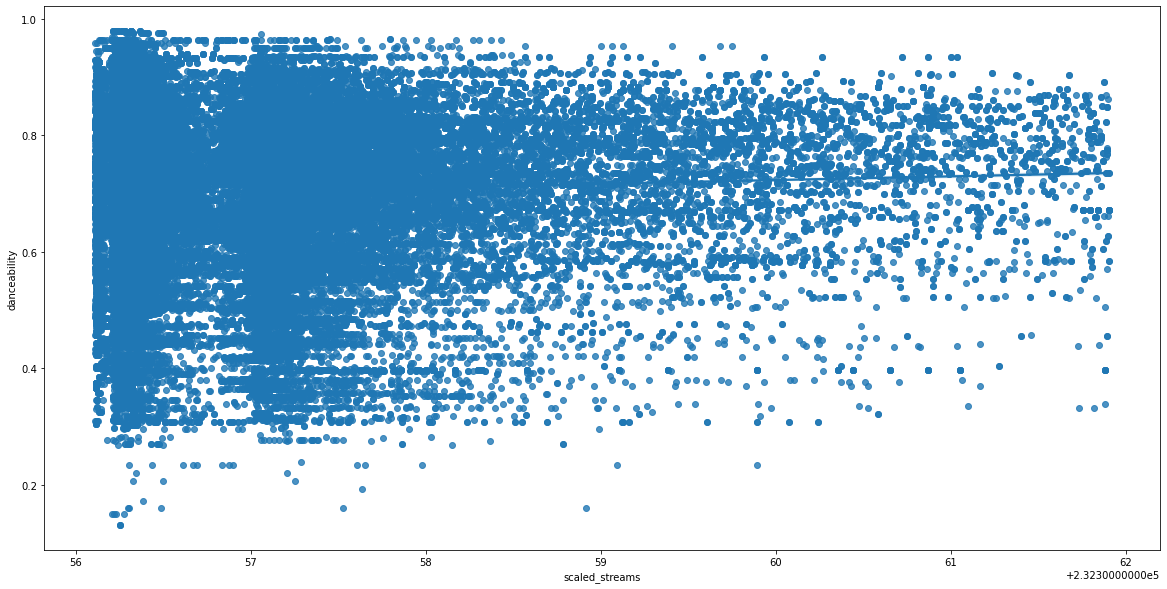

In [37]:
sb.regplot(x='scaled_streams',y='danceability',data=dt_filtered,scatter=True)

<AxesSubplot:xlabel='energy', ylabel='rank'>

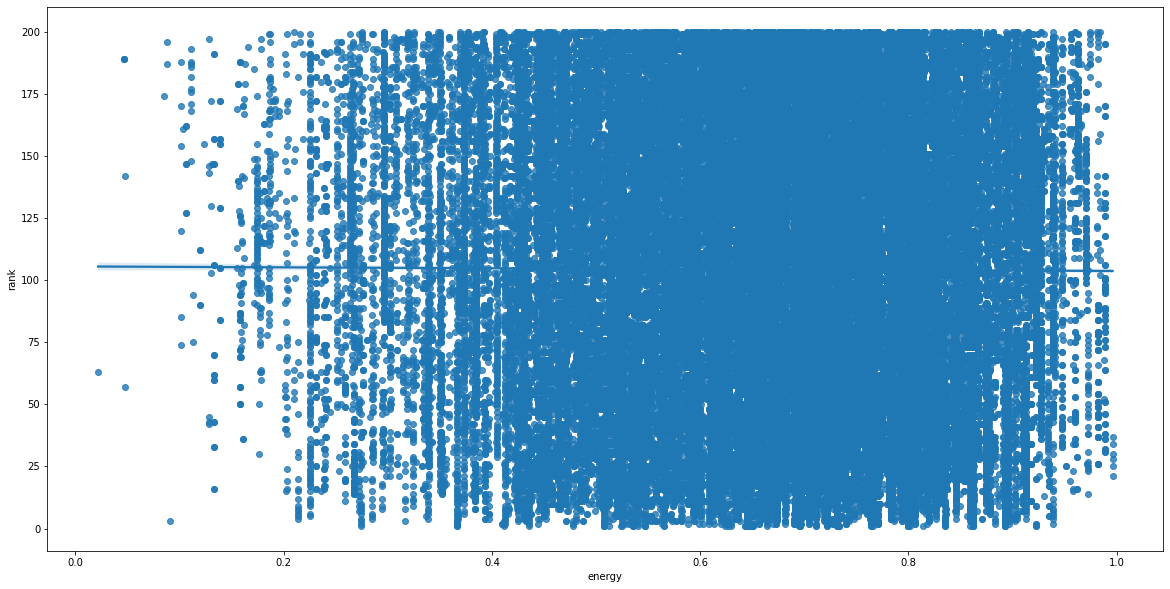

In [38]:
sb.regplot(x='energy',y='rank',data=dt_filtered,scatter=True)

In [39]:
# labels_to_normilze = [
#        'rank', 'scaled_streams','danceability', 'energy', 'key', 'mode', 'loudness',
#        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#        'valence', 'tempo']

# temp_df = pd.DataFrame(dt_filtered)
# dt_scaled = temp_df[labels_to_normilze]

# normalization
x=dt_filtered[[
       'rank', 'scaled_streams','danceability', 'energy', 'key', 'mode', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.58439189,  4.33892475, -0.40838754, ..., -0.76429746,
         0.40944203,  1.04603786],
       [-1.52996762,  3.82462468,  0.5040109 , ..., -0.43564134,
        -1.38027267, -0.75504722],
       [-1.47554334,  3.63910797,  0.81574703, ..., -0.5999694 ,
        -0.74913902, -1.03009362],
       ...,
       [ 0.79213474, -0.88160592, -0.30954438, ..., -0.63187776,
         1.05860807,  1.81797514],
       [ 0.86470044, -0.88356939,  1.1426898 , ...,  1.43897489,
         1.3696668 , -0.65849561],
       [ 0.90098329, -0.88483669, -1.44243911, ...,  1.98141703,
         1.45532065, -1.05547154]])

In [40]:
# mylist=['Riptide','Zukunft','OTRO FILI','Fly Away','Unfollow','Castigo','RAPSTAR','The Motto','lovely (with Khalid)']
# mylist=['We Don"t Talk About Bruno','Don"t Stop Believin','Dandelions','Una Nota','Distraction','Jacke zu','Unfollow','Brooklyn','Vérité']


In [133]:
# dt_scaled = dt_filtered [['rank',
#        'artist_id','streams', 'danceability',
#        'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo', 'scaled_streams',
#        'track_id']]

fields = ['uri','artist_names', 'artists_num' ,'artist_individual',
       'artist_id', 'artist_genre', 'track_name', 'track_id', 'country','region', 'language','scaled_streams']


kmeans = KMeans(n_clusters=7)  # Specify the number of clusters
song_features = dt_filtered.drop(fields, axis=1)  # Remove the identifier column
clusters = kmeans.fit_predict(song_features)  # Perform K-means clustering
dt_filtered['clusters'] = clusters  # Add cluster labels to the DataFrame
print(song_features.columns)

Index(['rank', 'streams', 'danceability', 'energy', 'key', 'mode', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'clusters', 'km_pred'],
      dtype='object')


In [134]:
input_features = song_features  # Use song features as input features
target_labels = clusters  # Use cluster labels as target labels

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    input_features, target_labels, test_size=0.2, random_state=42
)

In [136]:
# ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_features.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(target_labels)), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [137]:
model.fit(X_train, y_train, epochs=12, batch_size=40) #train

Epoch 1/12
1640/1640 [==============================] - 25s 15ms/step - loss: 721.1648 - accuracy: 0.3464
Epoch 2/12
1640/1640 [==============================] - 25s 15ms/step - loss: 374.8361 - accuracy: 0.4957
Epoch 3/12
1640/1640 [==============================] - 25s 15ms/step - loss: 306.5222 - accuracy: 0.5514
Epoch 4/12
1640/1640 [==============================] - 24s 15ms/step - loss: 260.0633 - accuracy: 0.5875
Epoch 5/12
1640/1640 [==============================] - 24s 15ms/step - loss: 203.4694 - accuracy: 0.6348
Epoch 6/12
1640/1640 [==============================] - 25s 15ms/step - loss: 178.8267 - accuracy: 0.6509
Epoch 7/12
1640/1640 [==============================] - 27s 17ms/step - loss: 130.5076 - accuracy: 0.6715
Epoch 8/12
1640/1640 [==============================] - 25s 15ms/step - loss: 99.2613 - accuracy: 0.6931
Epoch 9/12
1640/1640 [==============================] - 27s 17ms/step - loss: 74.9073 - accuracy: 0.7142
Epoch 10/12
1640/1640 [=========================

In [138]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

513/513 [==============================] - 3s 6ms/step - loss: 20.5766 - accuracy: 0.7120
Test loss: 20.576601028442383
Test accuracy: 0.7120370864868164


In [139]:
dt_filtered.sample(10)
print(dt_filtered.track_id)

6         65068
7         23278
8         22125
9         36647
10        20873
          ...  
105323    39077
105324    48118
105325    68172
105327    11399
105328      908
Name: track_id, Length: 81953, dtype: int32


In [140]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [141]:
# mylist=['Riptide','Zukunft','OTRO FILI','Fly Away','Unfollow','Castigo','RAPSTAR','The Motto','lovely (with Khalid)']
# mylist=['We Don"t Talk About Bruno','Don"t Stop Believin','Dandelions','Una Nota','Distraction','Jacke zu','Unfollow','Brooklyn','Vérité']

listened_songs = [58355,31842,20126,2130] # cluster 1
listened_song_features = song_features.loc[dt_filtered['track_id'].isin(listened_songs)]

predicted_probabilities = model.predict(listened_song_features)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

1/1 [==============================] - 0s 12ms/step


In [128]:
recommended_songs = dt_filtered.loc[dt_filtered['clusters'].isin(predicted_labels)]
recommended_songs.sample(10)

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,track_name,streams,danceability,...,liveness,valence,tempo,country,region,language,scaled_streams,track_id,clusters,km_pred
1467,spotify:track:7hU3IHwjX150XLoTVmjD0q,90,LISA,1.0,LISA,1547,k-pop,MONEY,353612,0.831,...,0.1520,0.396,140.026,Argentina,South America,Spanish,232357.594050,41793,1,5
43577,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,64,"Post Malone, Swae Lee",2.0,Swae Lee,579,trap,Sunflower - Spider-Man: Into the Spider-Verse,341032,0.755,...,0.0685,0.925,89.960,Australia,Oceania,English,232357.539909,63328,1,5
9261,spotify:track:4RuXJVAsDaF52Z8D6lYRXX,94,"Callejero Fino, L-Gante, Ecko, Kaleb Di Masi, ...",8.0,Ecko,665,trap argentino,Pa Tra Rkt - Remix,399077,0.877,...,0.3010,0.835,89.986,Argentina,South America,Spanish,232357.789719,51285,1,3
41774,spotify:track:0zLCBJZSiELJf02ucPP9wb,72,"SAINt JHN, Imanbek",2.0,SAINt JHN,81,slap house,Roses - Imanbek Remix,347336,0.769,...,0.3590,0.863,121.955,Australia,Oceania,English,232357.567039,57494,1,3
15521,spotify:track:3DarAbFujv6eYNliUTyqtz,93,"Doja Cat, SZA",2.0,Doja Cat,1625,pop,Kiss Me More (feat. SZA),325434,0.764,...,0.1200,0.781,110.970,Argentina,South America,Spanish,232357.472779,34719,1,3
43697,spotify:track:6EbVuwU7EnKeF2hdpViXCH,50,"Sleepy Hallow, 347aidan",2.0,Sleepy Hallow,1804,brooklyn drill,Die Young (feat. 347aidan),374858,0.808,...,0.1110,0.675,77.471,Australia,Oceania,English,232357.685487,18057,1,5
26614,spotify:track:748mdHapucXQri7IAO8yFK,66,"Doja Cat, SZA",2.0,SZA,2242,r&b,Kiss Me More (feat. SZA),380023,0.762,...,0.1230,0.742,110.968,Argentina,South America,Spanish,232357.707716,34682,1,3
9498,spotify:track:2rm9Jixn9sLzTM6PF8u8AH,78,"Eladio Carrion, Nicki Nicole",2.0,Eladio Carrion,1602,trap triste,Nota,418176,0.700,...,0.1110,0.643,91.050,Argentina,South America,Spanish,232357.871916,48558,1,5
2656,spotify:track:4uiFw0YvHosZT3qRf1QAvs,85,Tiago PZK,1.0,Tiago PZK,1608,trap argentino,Házmelo,319791,0.360,...,0.7210,0.279,81.387,Argentina,South America,Spanish,232357.448493,30870,1,1
14356,spotify:track:2MxHuZWC99rsELX9SrCW7K,103,"Wisin, Camilo, Los Legendarios",3.0,Los Legendarios,239,reggaeton flow,Buenos Días,328744,0.679,...,0.0847,0.966,171.915,Argentina,South America,Spanish,232357.487024,11336,1,3


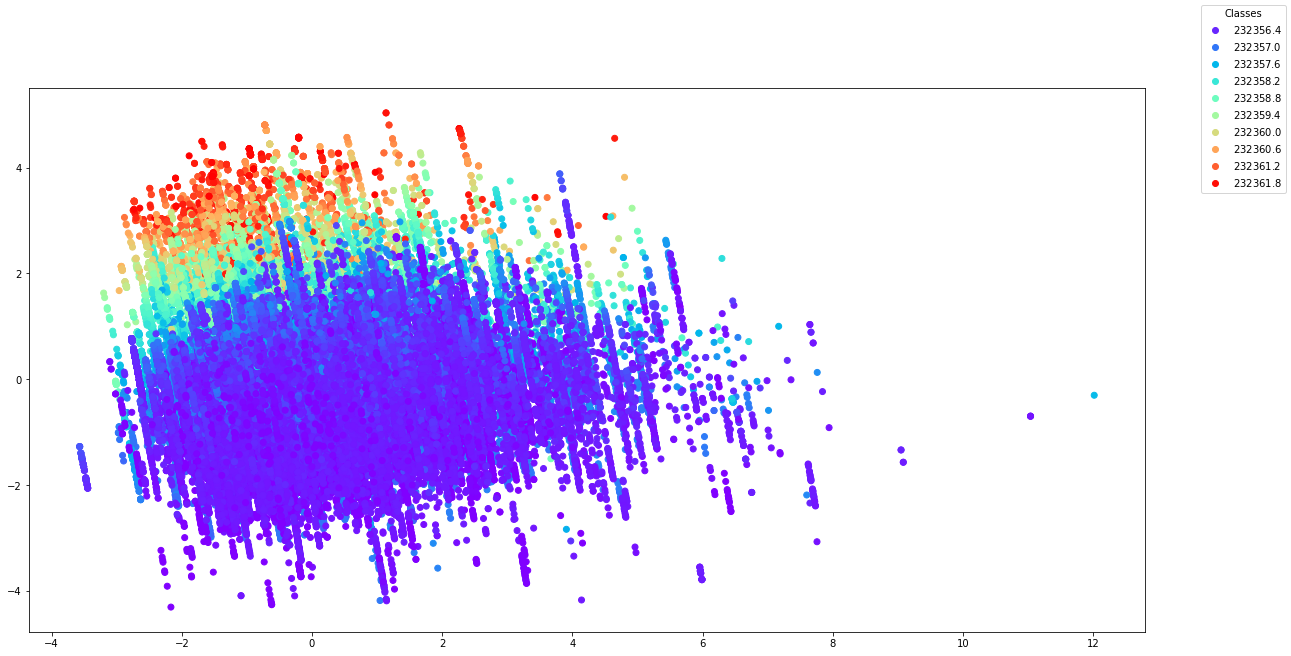

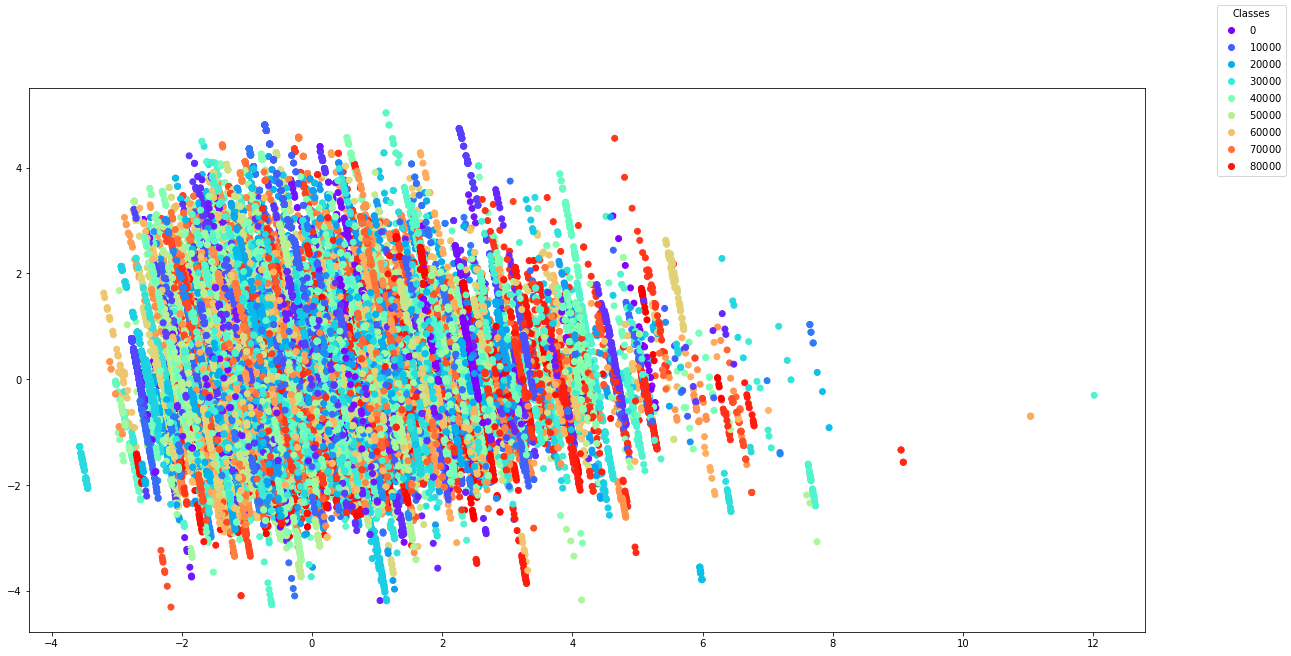

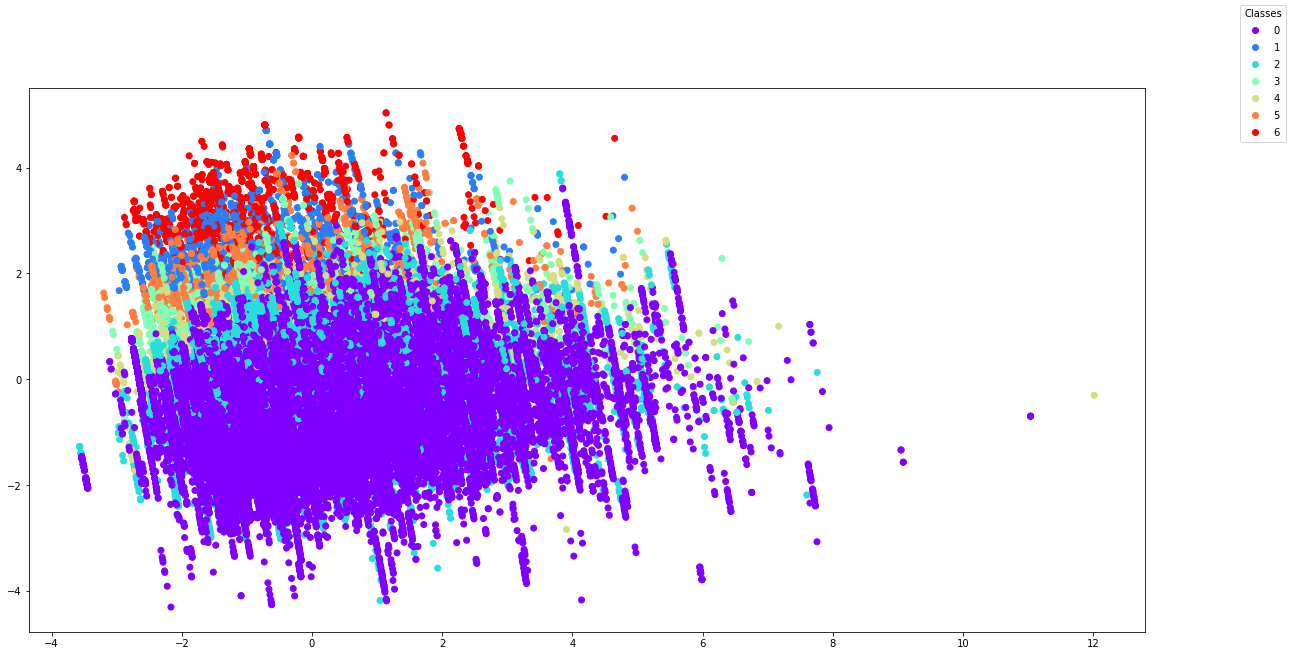

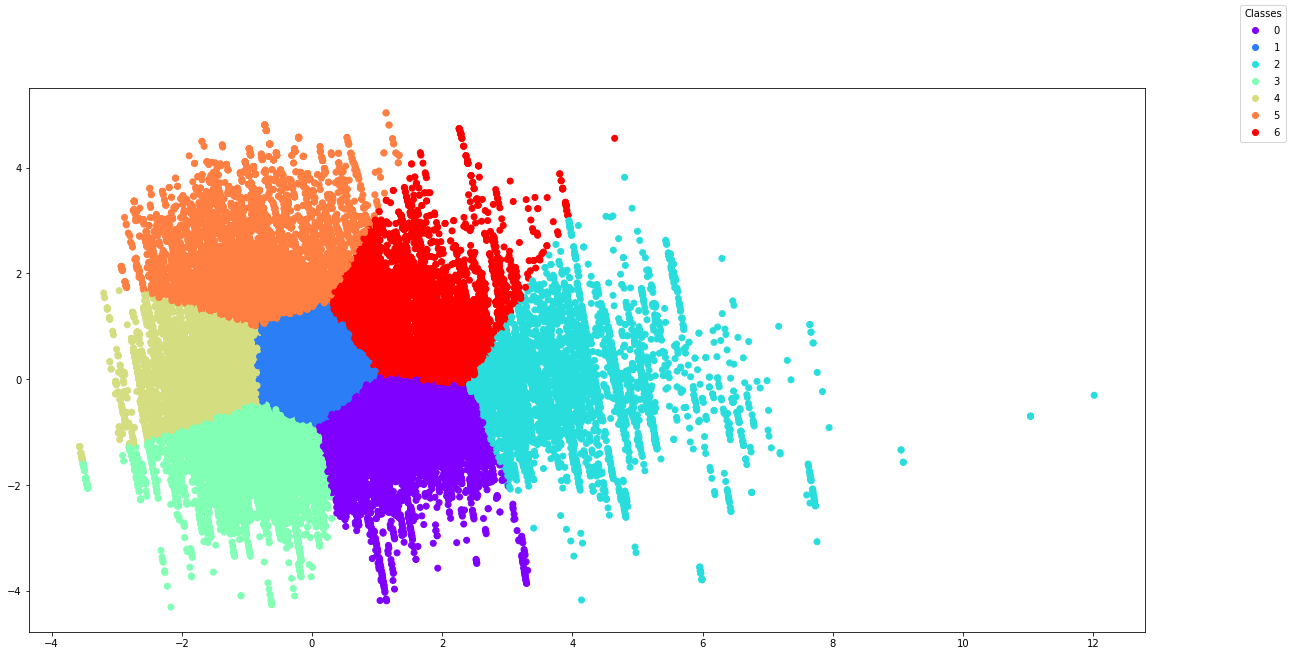

In [142]:
dt_filtered['km_pred'] = KMeans(n_clusters=7).fit_predict(x) 

pca = PCA(n_components=2)
x=pd.DataFrame(x)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1','P2']
x=x_principal

for i in range(-4,0):
    fig,ax = plt.subplots()
    scatter = ax.scatter(x['P1'],x['P2'],c=dt_filtered.iloc[:,i],cmap='rainbow')
    legend = fig.legend(*scatter.legend_elements(),loc='upper right', title="Classes")